# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [7]:
# Definir saudável (num = 0) e doente (num > 0)
df['doente'] = (df['num'] > 0).astype(int)

# Calcular o número de saudáveis e doentes por sexo
saudaveis = df.groupby('sex')['doente'].apply(lambda x: (x == 0).sum())
doentes = df.groupby('sex')['doente'].apply(lambda x: (x == 1).sum())
total = saudaveis + doentes

# Calcular a quantidade média de doentes por sexo
quantidade_media_doentes = doentes / total

# Calcular as odds por sexo
odds = doentes / saudaveis

# Calcular a odds total
odds_total = doentes.sum() / saudaveis.sum()

# Calcular o odds ratio por sexo (usando o total como referência)
odds_ratio = odds / odds_total

# Calcular o logito (LOG(Odds))
logito = np.log(odds)

# Calcular Weight of Evidence (WOE)
woe = np.log(odds_ratio)

# Resumo das estatísticas bivariadas
summary_df = pd.DataFrame({
    'Número de Saudáveis': saudaveis,
    'Número de Doentes': doentes,
    'Total': total,
    'Quantidade Média de Doentes': quantidade_media_doentes,
    'Odds': odds,
    'Odds Ratio': odds_ratio,
    'Logito (LOG(Odds))': logito,
    'Weight of Evidence (WOE)': woe
})

print("\nResumo das estatísticas bivariadas para a variável 'sex':")
summary_df



Resumo das estatísticas bivariadas para a variável 'sex':


,Número de Saudáveis,Número de Doentes,Total,Quantidade Média de Doentes,Odds,Odds Ratio,Logito (LOG(Odds)),Weight of Evidence (WOE)
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.05779,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.21441,0.379802


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [9]:
# Categorizar a variável 'age' em 5 grupos
df['age_group'] = pd.cut(df['age'], bins=5)

# Definir saudável (num = 0) e doente (num > 0)
df['doente'] = (df['num'] > 0).astype(int)

# Calcular o número de saudáveis e doentes por grupo de idade
saudaveis_age = df.groupby('age_group')['doente'].apply(lambda x: (x == 0).sum())
doentes_age = df.groupby('age_group')['doente'].apply(lambda x: (x == 1).sum())
total_age = saudaveis_age + doentes_age

# Calcular a quantidade média de doentes por grupo de idade
quantidade_media_doentes_age = doentes_age / total_age

# Calcular as odds por grupo de idade
odds_age = doentes_age / saudaveis_age

# Calcular a odds total
odds_total_age = doentes_age.sum() / saudaveis_age.sum()

# Calcular o odds ratio por grupo de idade (usando o total como referência)
odds_ratio_age = odds_age / odds_total_age

# Calcular o logito (LOG(Odds))
logito_age = np.log(odds_age)

# Calcular Weight of Evidence (WOE)
woe_age = np.log(odds_ratio_age)

# Calcular o valor médio da variável 'age' por grupo de idade
media_age = df.groupby('age_group')['age'].mean()

# Resumo das estatísticas bivariadas
summary_age_df = pd.DataFrame({
    'Número de Saudáveis': saudaveis_age,
    'Número de Doentes': doentes_age,
    'Total': total_age,
    'Quantidade Média de Doentes': quantidade_media_doentes_age,
    'Odds': odds_age,
    'Odds Ratio': odds_ratio_age,
    'Logito (LOG(Odds))': logito_age,
    'Weight of Evidence (WOE)': woe_age,
    'Valor Médio de Age': media_age
})

print("\nResumo das estatísticas bivariadas para a variável 'age':")
summary_age_df



Resumo das estatísticas bivariadas para a variável 'age':


<ipython-input-9-36a235a10175>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  saudaveis_age = df.groupby('age_group')['doente'].apply(lambda x: (x == 0).sum())
<ipython-input-9-36a235a10175>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doentes_age = df.groupby('age_group')['doente'].apply(lambda x: (x == 1).sum())
<ipython-input-9-36a235a10175>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_age = df.groupb

,Número de Saudáveis,Número de Doentes,Total,Quantidade Média de Doentes,Odds,Odds Ratio,Logito (LOG(Odds)),Weight of Evidence (WOE),Valor Médio de Age
age_group,,,,,,,,,
"(28.952, 38.6]",8,3,11,0.272727,0.375000,0.442446,-0.980829,-0.815437,35.181818
"(38.6, 48.2]",50,21,71,0.295775,0.420000,0.495540,-0.867501,-0.702108,43.704225
"(48.2, 57.8]",56,41,97,0.422680,0.732143,0.863823,-0.311780,-0.146387,53.567010
"(57.8, 67.4]",40,67,107,0.626168,1.675000,1.976259,0.515813,0.681206,61.775701
"(67.4, 77.0]",10,7,17,0.411765,0.700000,0.825899,-0.356675,-0.191282,70.529412


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

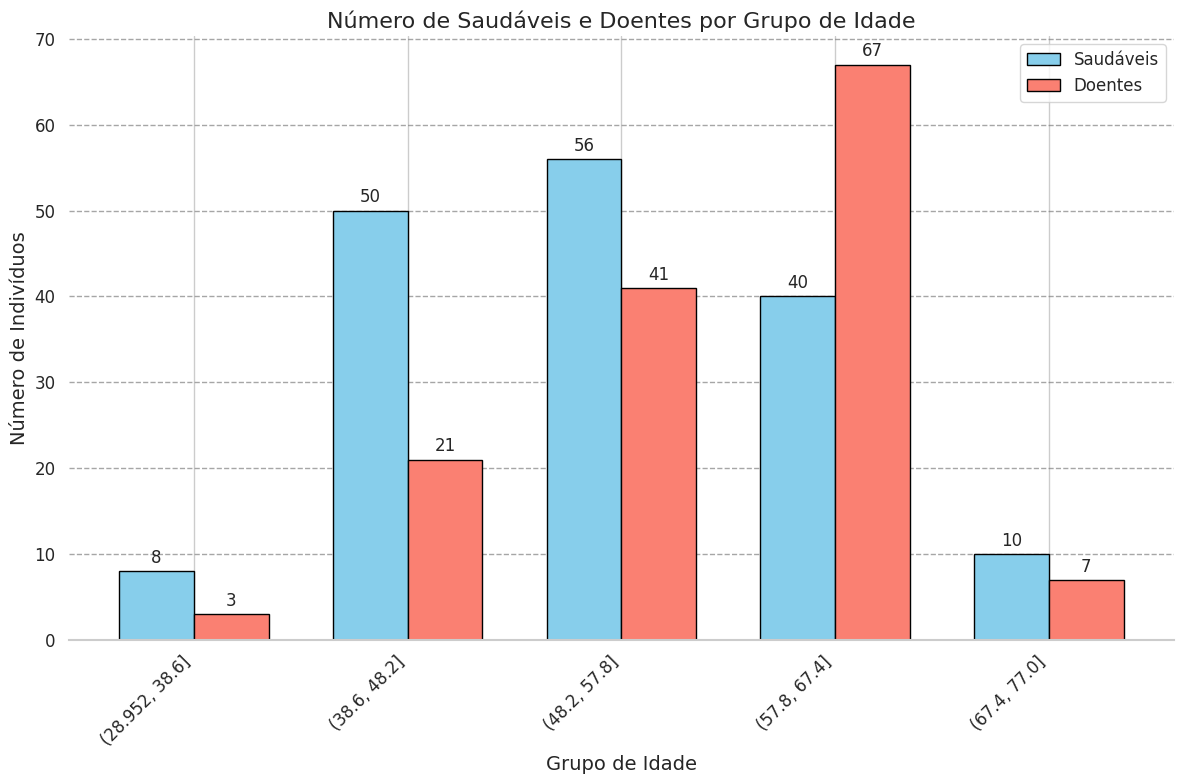

In [11]:
# Estilo do gráfico
sns.set(style="whitegrid")

# Dados para o gráfico
labels = summary_age_df.index.astype(str)
saudaveis = summary_age_df['Número de Saudáveis']
doentes = summary_age_df['Número de Doentes']

# Configuração do gráfico de barras
x = np.arange(len(labels))  # Posições das labels
width = 0.35  # Largura das barras

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, saudaveis, width, label='Saudáveis', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, doentes, width, label='Doentes', color='salmon', edgecolor='black')

# Adicionar título e rótulos aos eixos
ax.set_title('Número de Saudáveis e Doentes por Grupo de Idade', fontsize=16)
ax.set_xlabel('Grupo de Idade', fontsize=14)
ax.set_ylabel('Número de Indivíduos', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)
ax.legend(fontsize=12)

# Adicionar rótulos de valor às barras
ax.bar_label(bars1, padding=3, fontsize=12)
ax.bar_label(bars2, padding=3, fontsize=12)

# Estilização adicional
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=12)

# Adicionar grid
ax.yaxis.grid(True, color='gray', linestyle='dashed', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()
plt.show()
